<a href="https://colab.research.google.com/github/tianliiii/STA410_W24_StatisticalComputation/blob/main/%E3%80%8CSTA410_W24_Week3_Homework_ProbabilisticProgrammingPyMC_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework #3

> 0. You'll need to use google colob for this homework -- `PyMC` is currently unavailable on UofT Jupyterhub
> 1. To get up to speed with using `PyMC` first review this weeks [coding demo](https://github.com/pointOfive/STA410_W24_StatisticalComputation/blob/main/Week3/STA410_W24_Week3_Demo_HMCwithPyMC.ipynb), and potentially the references at the end of the coding demo which were added as resources for competing this homework

0. Find a classification data set on [kaggle](https://www.kaggle.com)
1. Use `PyMC` to provide posterior inference for a Bayesian logistic regression analysis predicting the classification outcome with some of the other features of the data set
    - You should know that logistic regression defines the [probability](https://en.wikipedia.org/wiki/Logistic_regression#Model) of a [Bernoulli](https://en.wikipedia.org/wiki/Binomial_distribution#Probability_mass_function) outcome distribution using a linear model, but if you're unfamiliar with this model you'll be able to find many explanations online
    - A Bayesian logistic regression analysis simply needs the additional specification of priors on the coefficients of the linear model
    - **For half credit** you can try to use the "out of the box" [PyMC logistic regression functionality](https://www.pymc.io/projects/docs/en/v3/pymc-examples/examples/generalized_linear_models/GLM-logistic.html) [though I'm not 100% this is working for the current version of `PyMC`]
    - **For 3/4 credit**, rather than the above "out of the box" option, and instead specify your own priors for the $\beta$ coefficients, use a ***logit link function***, and the matrix multiplication form of logistic regression    
        - Here's a [simple linear regression](https://www.pymc.io/projects/docs/en/v3.11.4/pymc-examples/examples/generalized_linear_models/GLM-linear.html) example, but by dropping `intercept = Normal("Intercept", 0, sigma=20)` and adding the `shape` parameter for `x_coeff = pm.Normal("x", 0, sigma=20)` you can treat `x_coeff` as a vector and do multiple linear regression based on `pm.math.dot(X, x_coeff)` for any design matrix `X` in the manner described [here](https://discourse.pymc.io/t/matrix-multiplication-in-pymc3/111x4) (although they don't incorporate the intercept into the `x_coeff` vector in that example, which I would suggest you do unless you want to specify the intercept prior distinctly)     
            - A shorthand notation for  `pymc.math.dot(X, x_coeff)` is `X@x_coeff`, and for both of these `X` needs to be a `numpy.array` data type (and can't be a `pd.DataFrame` data type)
            - A `pd.DataFrame` data type would be a good way to read in the data, and then you can use `y = df.y.values` and `X = df[list_of_column_names]; X["intercept"]=1; X.values` to get the outcome and design matrix
            - Warnings that the log likelihood is `np.nan` are caused by the likelihood evaluating to `0` which would easily happen if, e.g., `pymc.math.invloit(X@x_coeff)` causes $\prod_{i=1}^n p_i^x (1-p_i)^{n-x}$ to evaluate to $0$
            - The `mu` parameter of the `pm.Normal` prior can be a vector of different values rather than being all `0`
    - **For full credit** use a ***probit link function*** instead of a ***logit link function***




2. Your posterior inference should be similar to that of the "Getting Started" material [here](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#model-checking), which only requires a few simple function calls

3. There will be no MarkUs autochecks in the usual manner for this assignment; but, submit your notebook in the usual way on MarkUs except ensure all your figures have been rendered in your notebook upon submission as the evaluation of your work will be besed upon a visual inspection of your code and figure


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving smoking.csv to smoking.csv


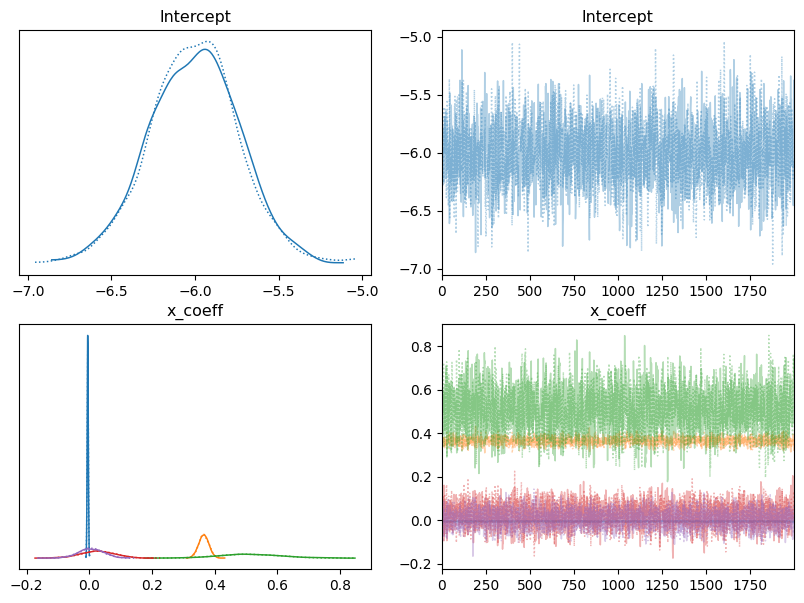

In [ ]:
import pymc as pm
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('smoking.csv')
df = df.iloc[0:5000]


# Extracting variables
y = df['smoking'].values
X = df[['age', 'hemoglobin', 'serum creatinine', 'eyesight(left)', 'eyesight(right)']].values

# Define the logistic regression model with probit link function
with pm.Model() as logistic_model_probit:
    # Define priors
    intercept = pm.Normal("Intercept", 0, sigma=20)
    x_coeff = pm.Normal("x_coeff", 0, sigma=20, shape=5)

    # Linear model
    linear_model = intercept + pm.math.dot(X, x_coeff)

    # Probit link function
    p = pm.math.invprobit(linear_model)


    # Likelihood (sampling distribution) of observations
    fit = pm.Bernoulli('Y', p, observed=y)
# Run Bayesian inference
SEED = [20100420, 20134234]

with logistic_model_probit:
  fit = pm.sample(2000, tune = 2000, random_seed=SEED)

az.plot_trace(fit, figsize=(10, 7));

